### Мини-проект #2 по статистике. 
### Расчет нескольких продуктовых метрик. Какие распределения могут встретиться на практике

#### METADATA:
    • ad_id – идентификатор объявления (рекламы)
    • xyz_campaign_id – идентификатор рекламной кампании в базе компании X
    • fb_campaign_id – идентификатор кампании в Facebook
    • age – возрастная группа, которой показывалась реклама
    • gender – пол тех, кому показывалась реклама
    • interest – код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
    • impressions – число показов
    • clicks – число кликов
    • spent – сумма, которую компания потратила на показ объявления 
    • total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
    • approved_conversion – количество людей, которые купили продукт после просмотра рекламы

#### Задание:
1.	Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2.	Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3.	Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4.	Проанализируйте CTR с разбивкой по рекламной кампании.
5.	Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.
6.	Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.
7.	Посчитайте конверсию из клика в покупку.

In [39]:
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import numpy             as np

from scipy.stats import mode

sns.set(rc = {'figure.figsize':(16, 6)}, style = "whitegrid")

In [3]:
path        = 'C:\\Users\\user\\Karpov_courses\\Аналитик_данных\\Statistic\\Mini_projects\\Mini_pj_2_Stat_metrics\\2.9 conversion.csv'
conversions = pd.read_csv(path)

In [4]:
conversions.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


In [6]:
conversions.shape

(1143, 11)

In [13]:
conversions.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [8]:
# проверка на пустные значения
conversions.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [11]:
# проверка на дубликаты
conversions.duplicated().sum()

0

In [18]:
conversions.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [14]:
conversions.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [34]:
# уникальные рекламные компании
conversions.xyz_campaign_id.unique()

array([ 916,  936, 1178], dtype=int64)

In [35]:
# количество уникальных рекламных компаний
conversions.xyz_campaign_id.nunique()

3

In [36]:
# 2. Постройте график распределения числа показов (Impressions) компании fb_campaign_id для каждой рекламы, прологарифмировав значения.

In [37]:
conversions.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


<Axes: xlabel='Impressions', ylabel='Count'>

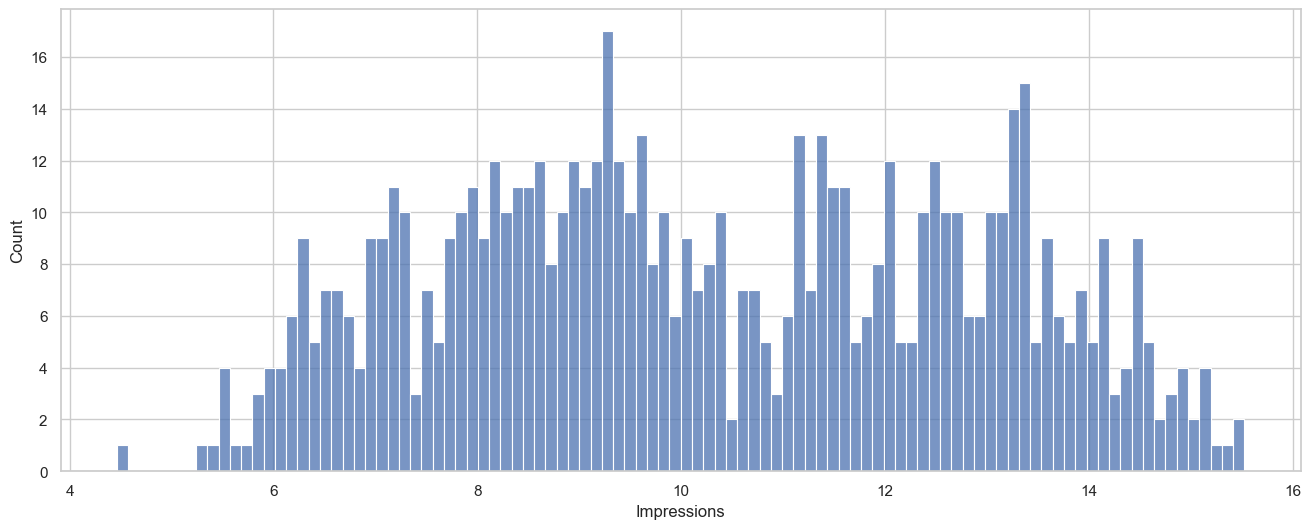

In [43]:
sns.histplot(np.log(\
                    conversions.groupby('fb_campaign_id')\
                    .Impressions.sum()
                   ), kde = False, bins = 100 
)
# получено бимодальное распределение (не является нормальным распределением)

In [44]:
# Кластеризация данных

from sklearn.mixture import GaussianMixture                                                    # метод кластеризации

dat    = np.log(conversions.groupby('fb_campaign_id').Impressions.sum()).values.reshape(-1, 1) # подготовка данных

mix    = GaussianMixture(n_components = 2).fit(dat)                                            # построение модели

labels = mix.predict(dat)                                                                      # вычисляем принадлежности

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


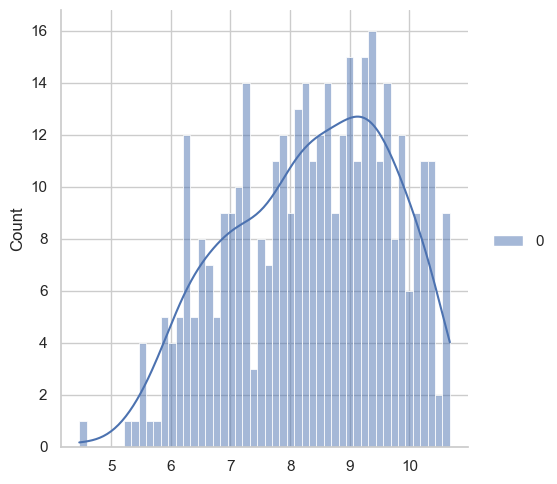

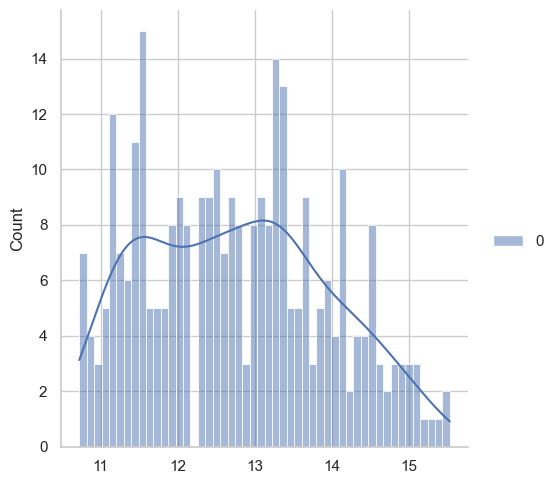

In [53]:
sns.displot(dat[labels == 0], kde = True, bins = 50) 
sns.displot(dat[labels == 1], kde = True, bins = 50)

In [54]:
# 3. Создайте новую колонку c CTR (кол-во кликов/к показам). Посмотрите на описательные статистики и распределение.

In [56]:
conversions.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0


In [60]:
conversions['CTR'] = conversions.Clicks / conversions.Impressions

In [61]:
conversions.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [64]:
conversions.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

D:\ANACONDA\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CTR', ylabel='Count'>

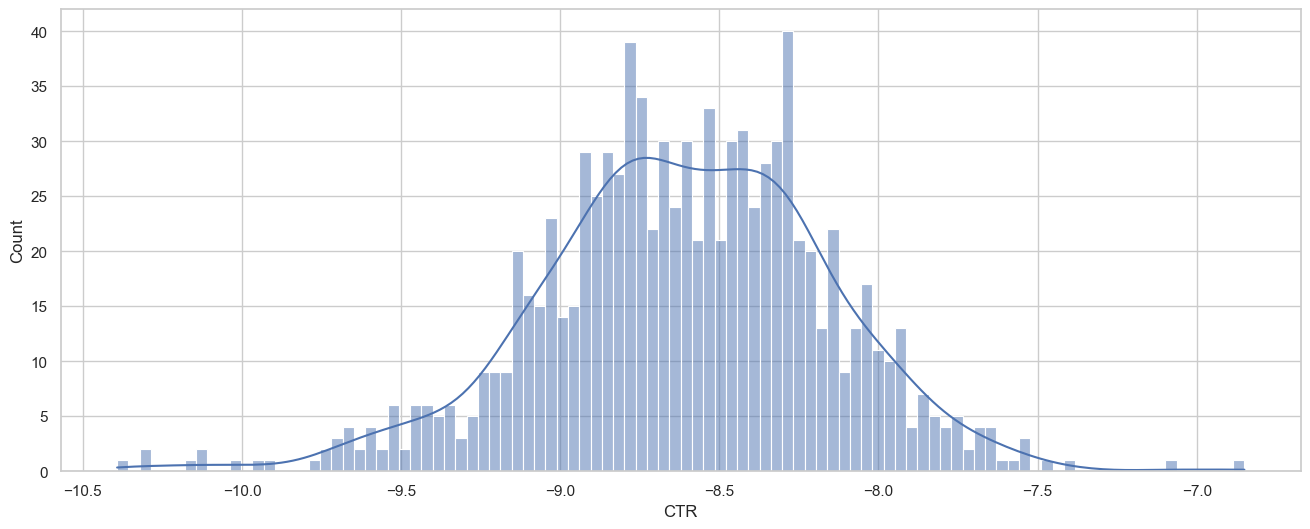

In [72]:
sns.histplot(np.log(conversions.CTR), kde = True, bins = 100)

In [129]:
# максимальный CTR
conversions.CTR.sort_values(ascending = False).head(1)

150    0.001059
Name: CTR, dtype: float64

In [142]:
# ad_id с максимальным CTR
conversions.set_index('ad_id').CTR.idxmax()

738637

In [101]:
df1 = conversions[["ad_id", "CTR"]]
df1

,ad_id,CTR
0,708746,0.000136
1,708749,0.000112
2,708771,0.000000
3,708815,0.000235
4,708818,0.000242
...,...,...
1138,1314410,0.000223
1139,1314411,0.000188
1140,1314412,0.000185
1141,1314414,0.000171


In [127]:
# 4. Проанализируйте CTR с разбивкой по рекламной кампании.

In [137]:
df2 = conversions[["xyz_campaign_id", "ad_id", "CTR"]].groupby('xyz_campaign_id').CTR.sum()

<Axes: xlabel='xyz_campaign_id', ylabel='CTR'>

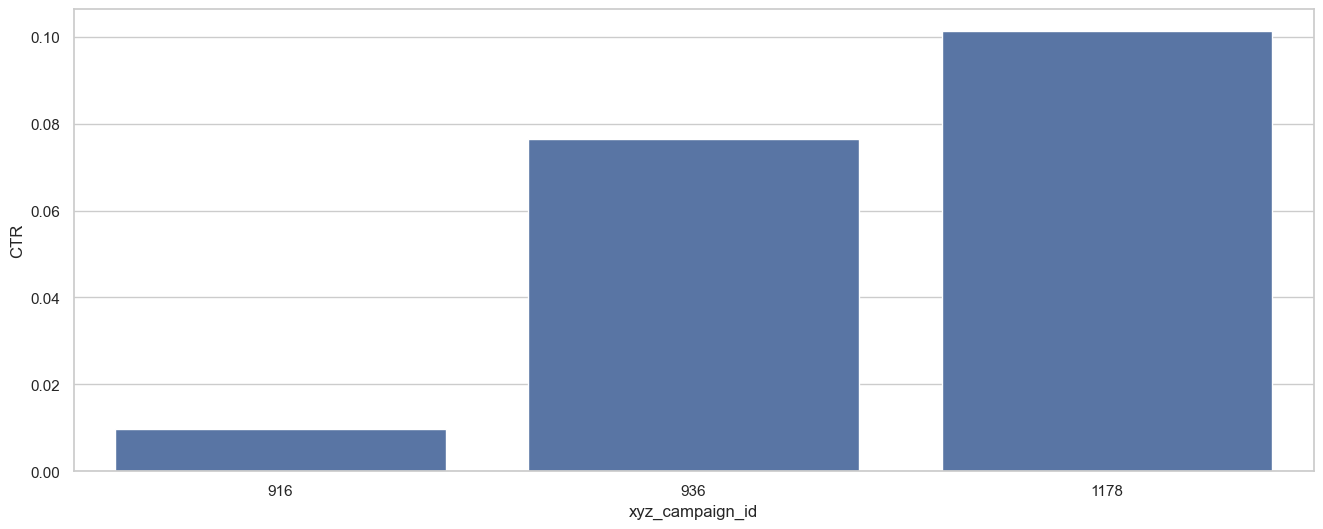

In [138]:
sns.barplot(df2)

D:\ANACONDA\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CTR', ylabel='Count'>

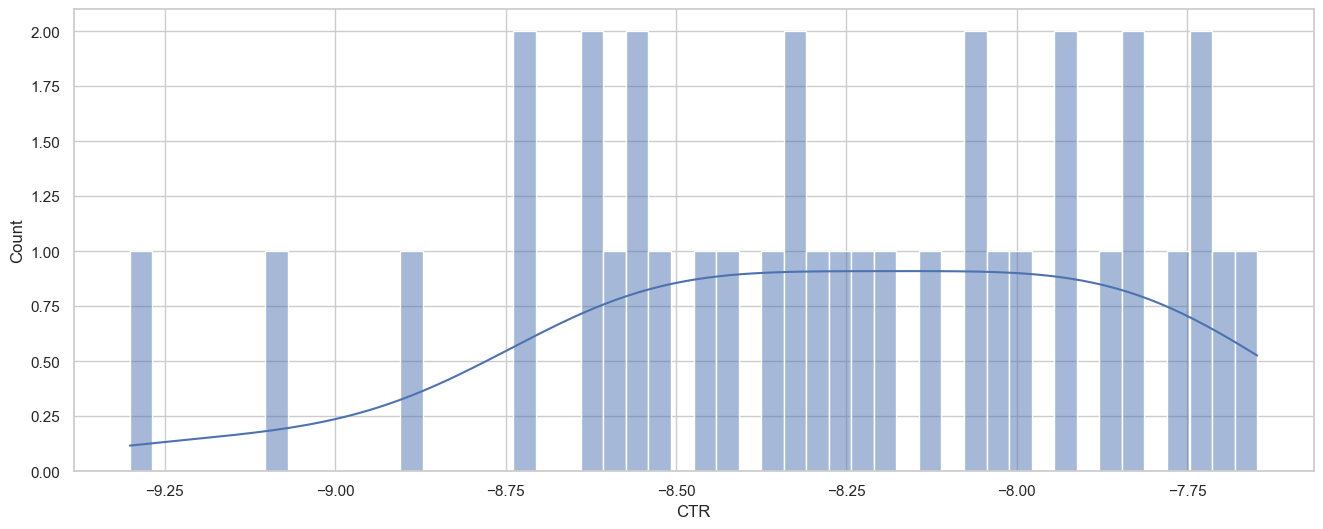

In [156]:
sns.histplot(np.log(conversions[conversions.xyz_campaign_id == 916].CTR), kde = True, bins = 50)

D:\ANACONDA\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CTR', ylabel='Count'>

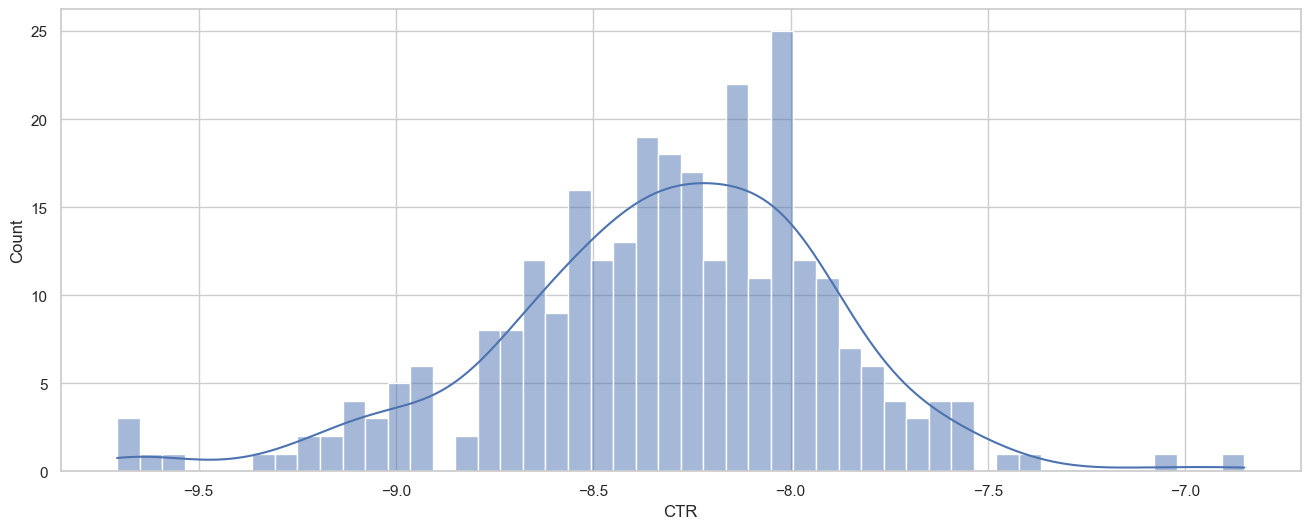

In [157]:
sns.histplot(np.log(conversions[conversions.xyz_campaign_id == 936].CTR), kde = True, bins = 50)

D:\ANACONDA\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CTR', ylabel='Count'>

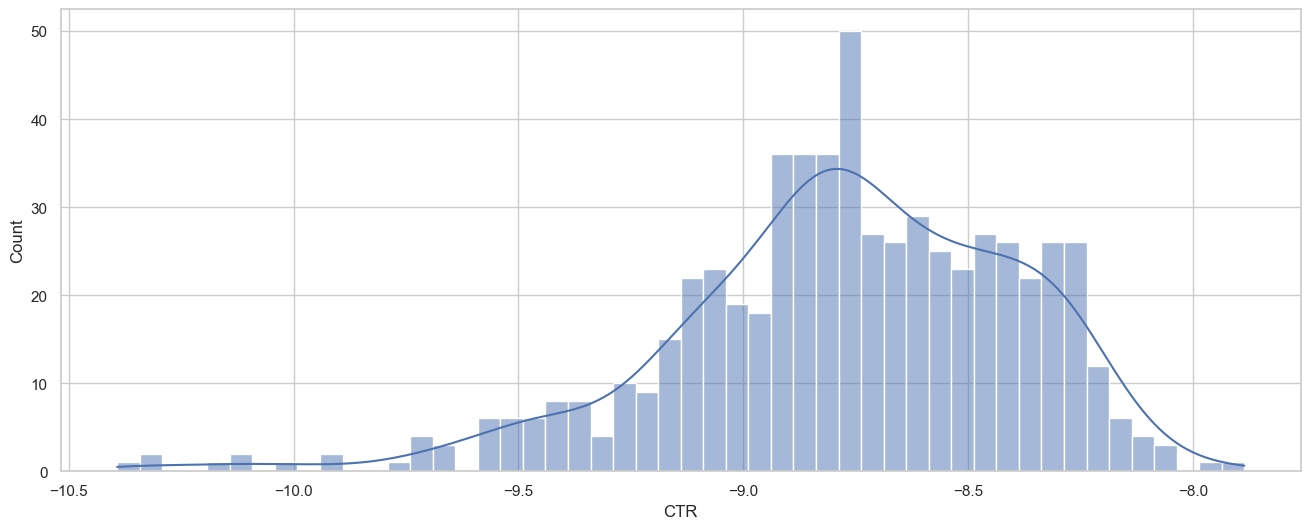

In [158]:
sns.histplot(np.log(conversions[conversions.xyz_campaign_id == 1178].CTR), kde = True, bins = 50)

<Axes: xlabel='CTR', ylabel='Count'>

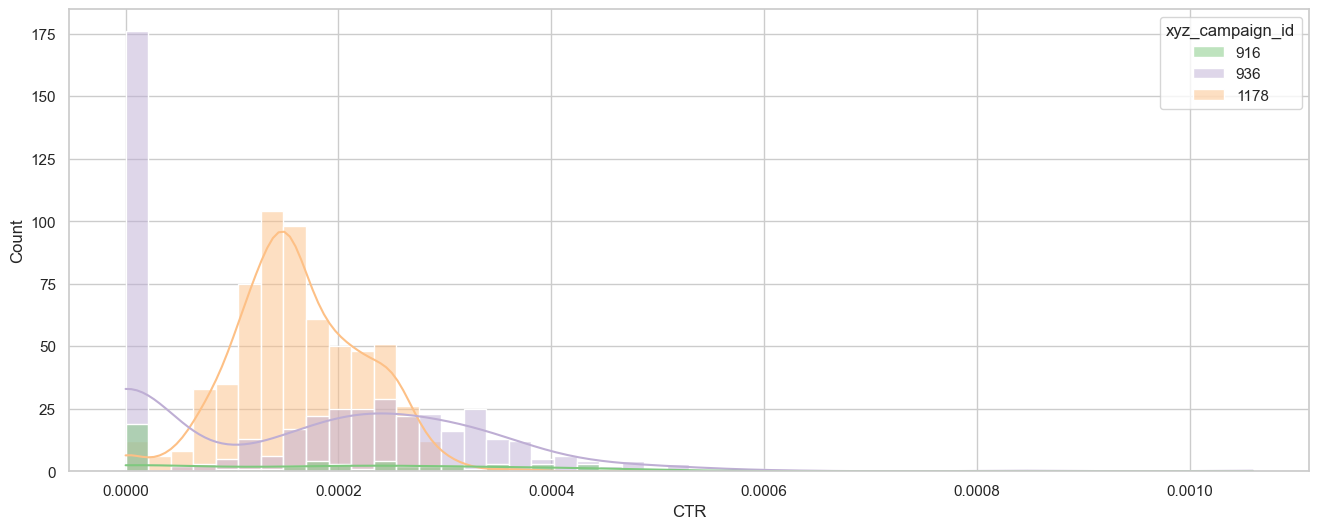

In [163]:
sns.histplot(data      = conversions
             , x       = 'CTR'
             , hue     = 'xyz_campaign_id'
             , kde     = True
             , bins    = 50
             , palette = 'Accent')

In [144]:
# 5. Посчитайте стоимость за клик пользователя по объявлению (CPC). 
#    Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.

In [165]:
conversions['CPC'] = conversions.Spent / conversions.Clicks

In [166]:
conversions.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91


In [167]:
conversions.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

<Axes: xlabel='CPC', ylabel='Count'>

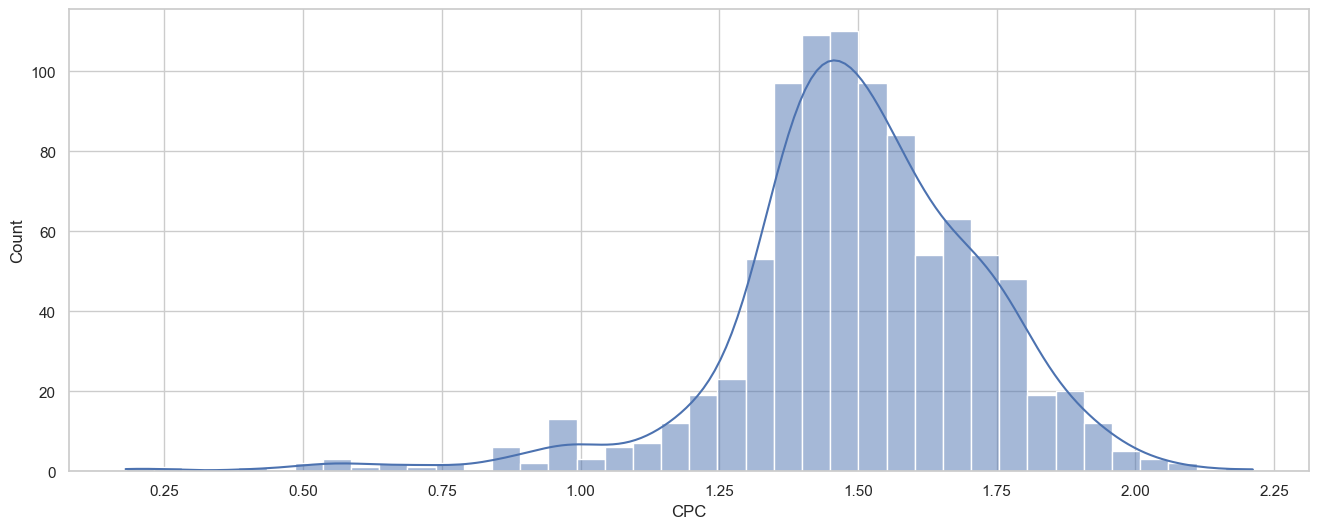

In [197]:
sns.histplot(conversions.CPC, kde = True)

In [183]:
# 6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

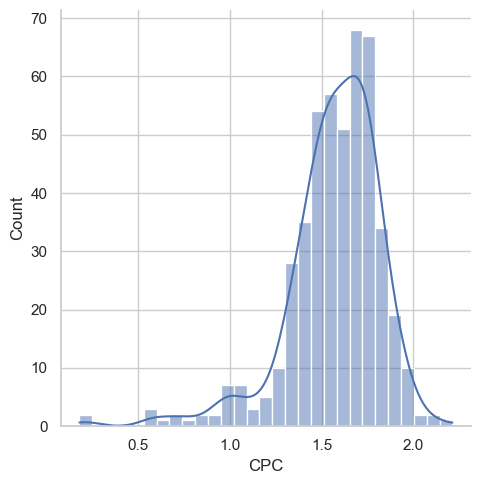

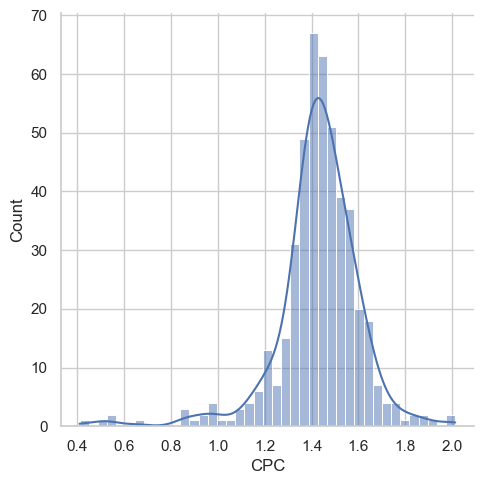

In [196]:
sns.displot(conversions.query("gender == 'M'").CPC.dropna(), kde = True)
sns.displot(conversions.query("gender == 'F'").CPC.dropna(), kde = True)

<Axes: xlabel='CPC', ylabel='Count'>

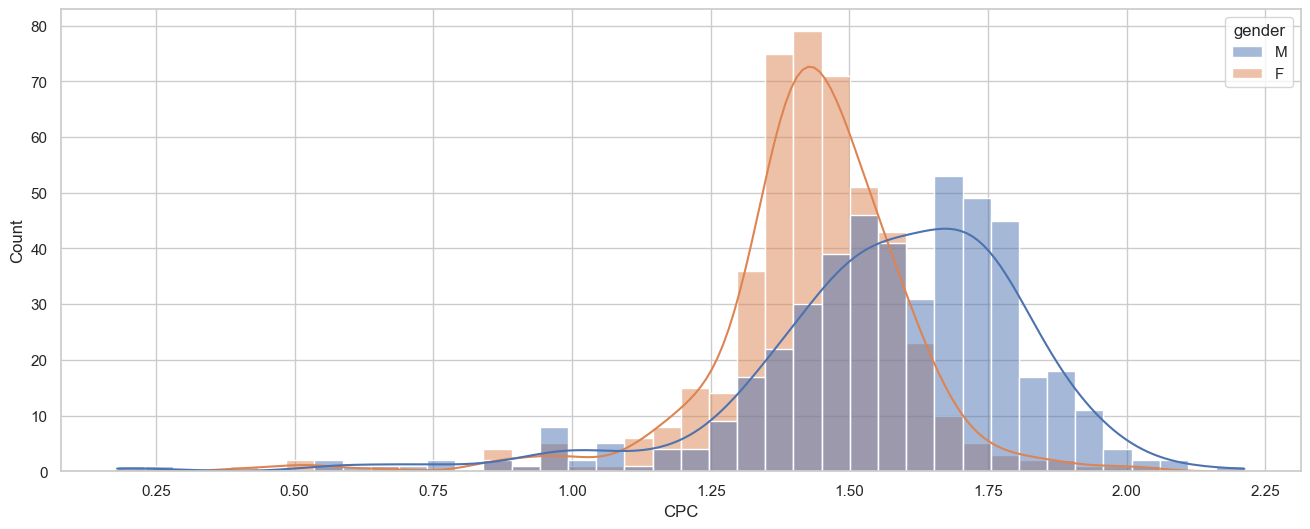

In [195]:
sns.histplot(data = conversions, x = 'CPC', hue = 'gender', kde = True)

In [194]:
# 7. Посчитайте конверсию из клика в покупку.

In [198]:
conversions['conv_rate'] = (conversions.Approved_Conversion / conversions.Clicks).mul(100)

In [200]:
conversions.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conv_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0


<Axes: xlabel='conv_rate', ylabel='Count'>

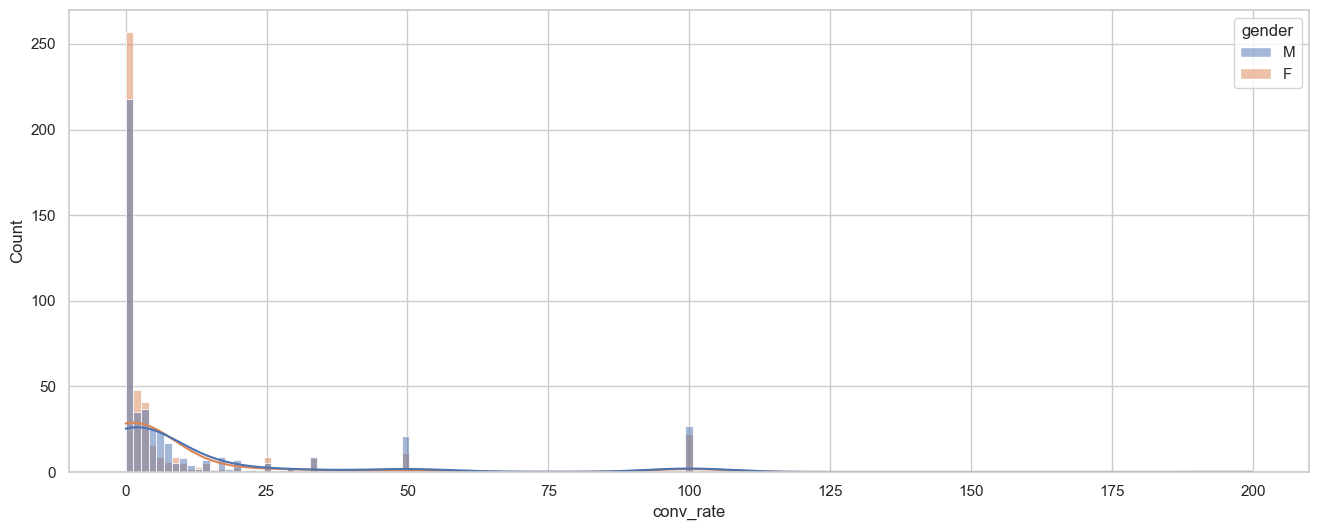

In [199]:
sns.histplot(data = conversions, x = 'conv_rate', hue = 'gender', kde = True) 